In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [10]:
# 1. Load the Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Iris Dataset (first 5 rows of features):")
print(X.head())
print("\nTarget Variable (first 5 rows):")
print(y.head())
print(f"\nTarget Names: {iris.target_names}")


Iris Dataset (first 5 rows of features):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target Variable (first 5 rows):
0    0
1    0
2    0
3    0
4    0
dtype: int64

Target Names: ['setosa' 'versicolor' 'virginica']


In [11]:
# 2. Split the Data
# Using a common split size, e.g., 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (105, 4), (105,)
Testing data shape: (45, 4), (45,)


In [12]:
# 3. Train the Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


In [13]:
# 4. Make Predictions
y_pred = dt_classifier.predict(X_test)

print("Predictions on Test Set (first 10):")
predictions_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred})
print(predictions_df.head(10))


Predictions on Test Set (first 10):
   Actual  Predicted
0       2          2
1       1          1
2       2          2
3       1          2
4       2          2
5       2          2
6       1          1
7       1          1
8       0          0
9       2          2


In [14]:
# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



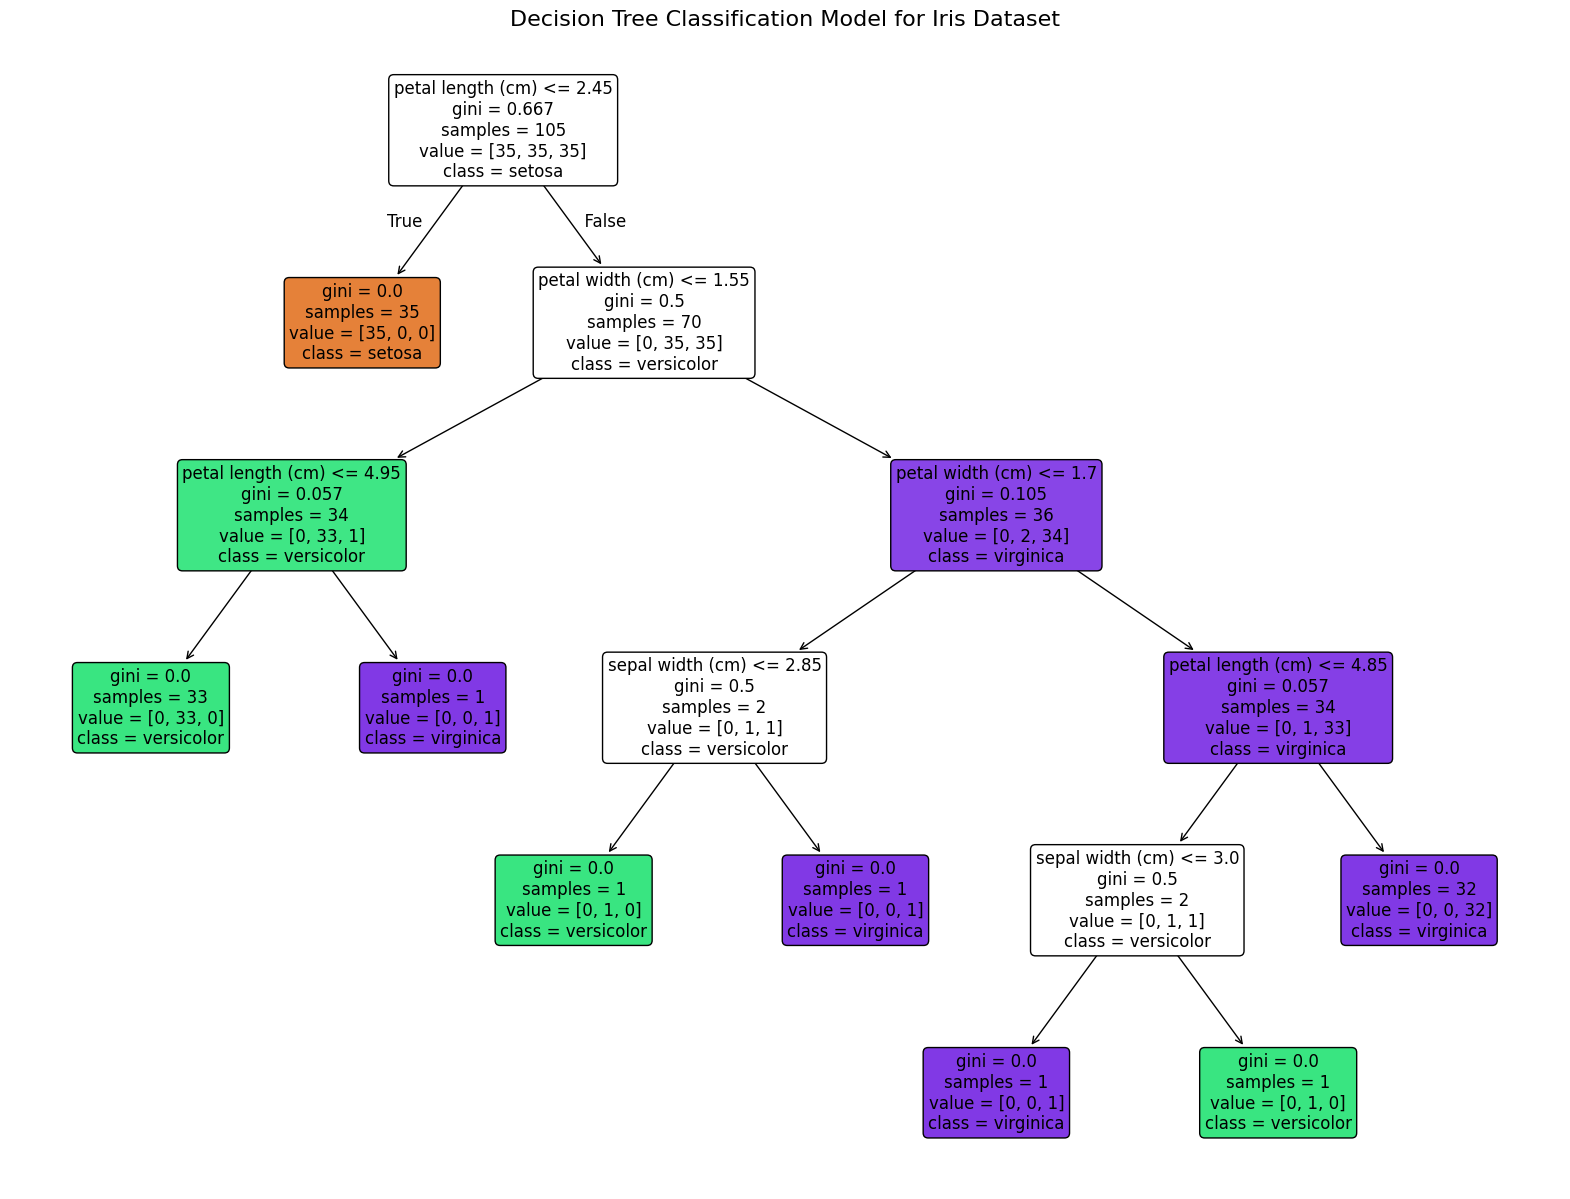

In [15]:
# 6. Visualize the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Classification Model for Iris Dataset", fontsize=16)
plt.show()


In [16]:
# 7. Classify a New Sample
print("Classifying a New Sample:")

# Example new sample: sepal length=5.1, sepal width=3.5, petal length=1.4, petal width=0.2 (Looks like a Setosa)
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
print(f"\nNew Sample to classify:\n{new_sample}")

new_sample_prediction = dt_classifier.predict(new_sample)
new_sample_prediction_species = iris.target_names[new_sample_prediction][0]

print(f"\nThe new sample is predicted to be: '{new_sample_prediction_species}'")


Classifying a New Sample:

New Sample to classify:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2

The new sample is predicted to be: 'setosa'
